In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sqlalchemy import create_engine

In [2]:
# Display Prefrences:
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
))

heartdisease_df = pd.read_sql_query('select * from heartdisease', con=engine)

# No need for an open connection, because you're only doing a single query:
engine.dispose()

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)

# heartdisease_df_2 = heartdisease_df.copy()

In [3]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [12]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

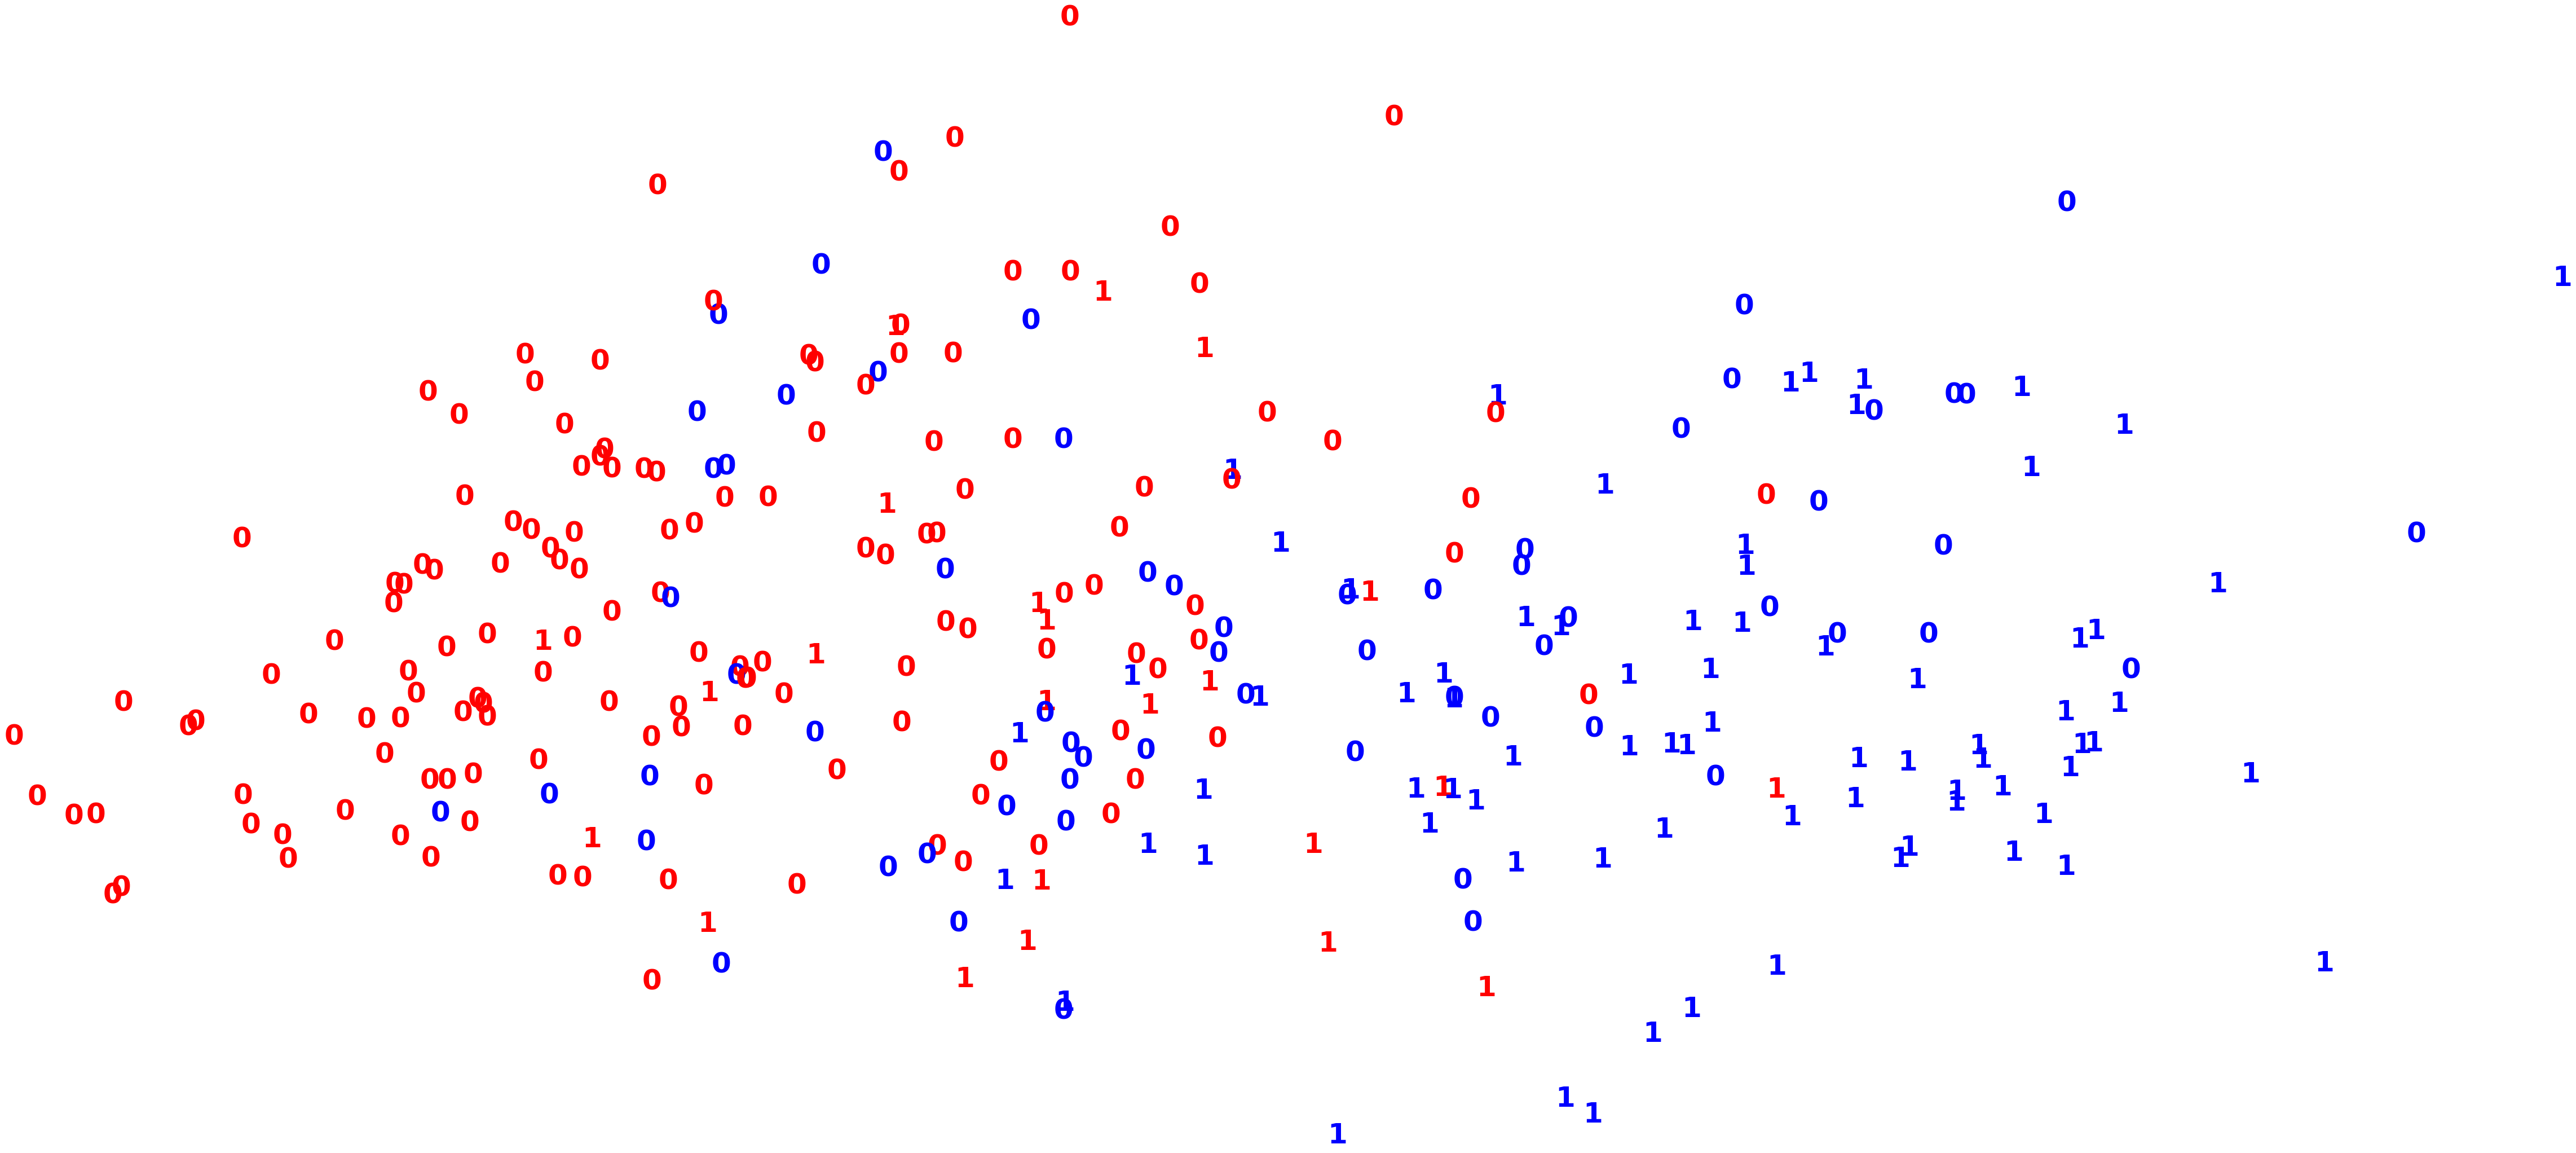

In [13]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [14]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445


In [15]:
# re-labeling
clusters = np.array([2 if x == 1 else 1 if x==0 else 0 for x in clusters])

pd.crosstab(y,clusters)

col_0,1,2
row_0,,
0,141,23
1,63,76


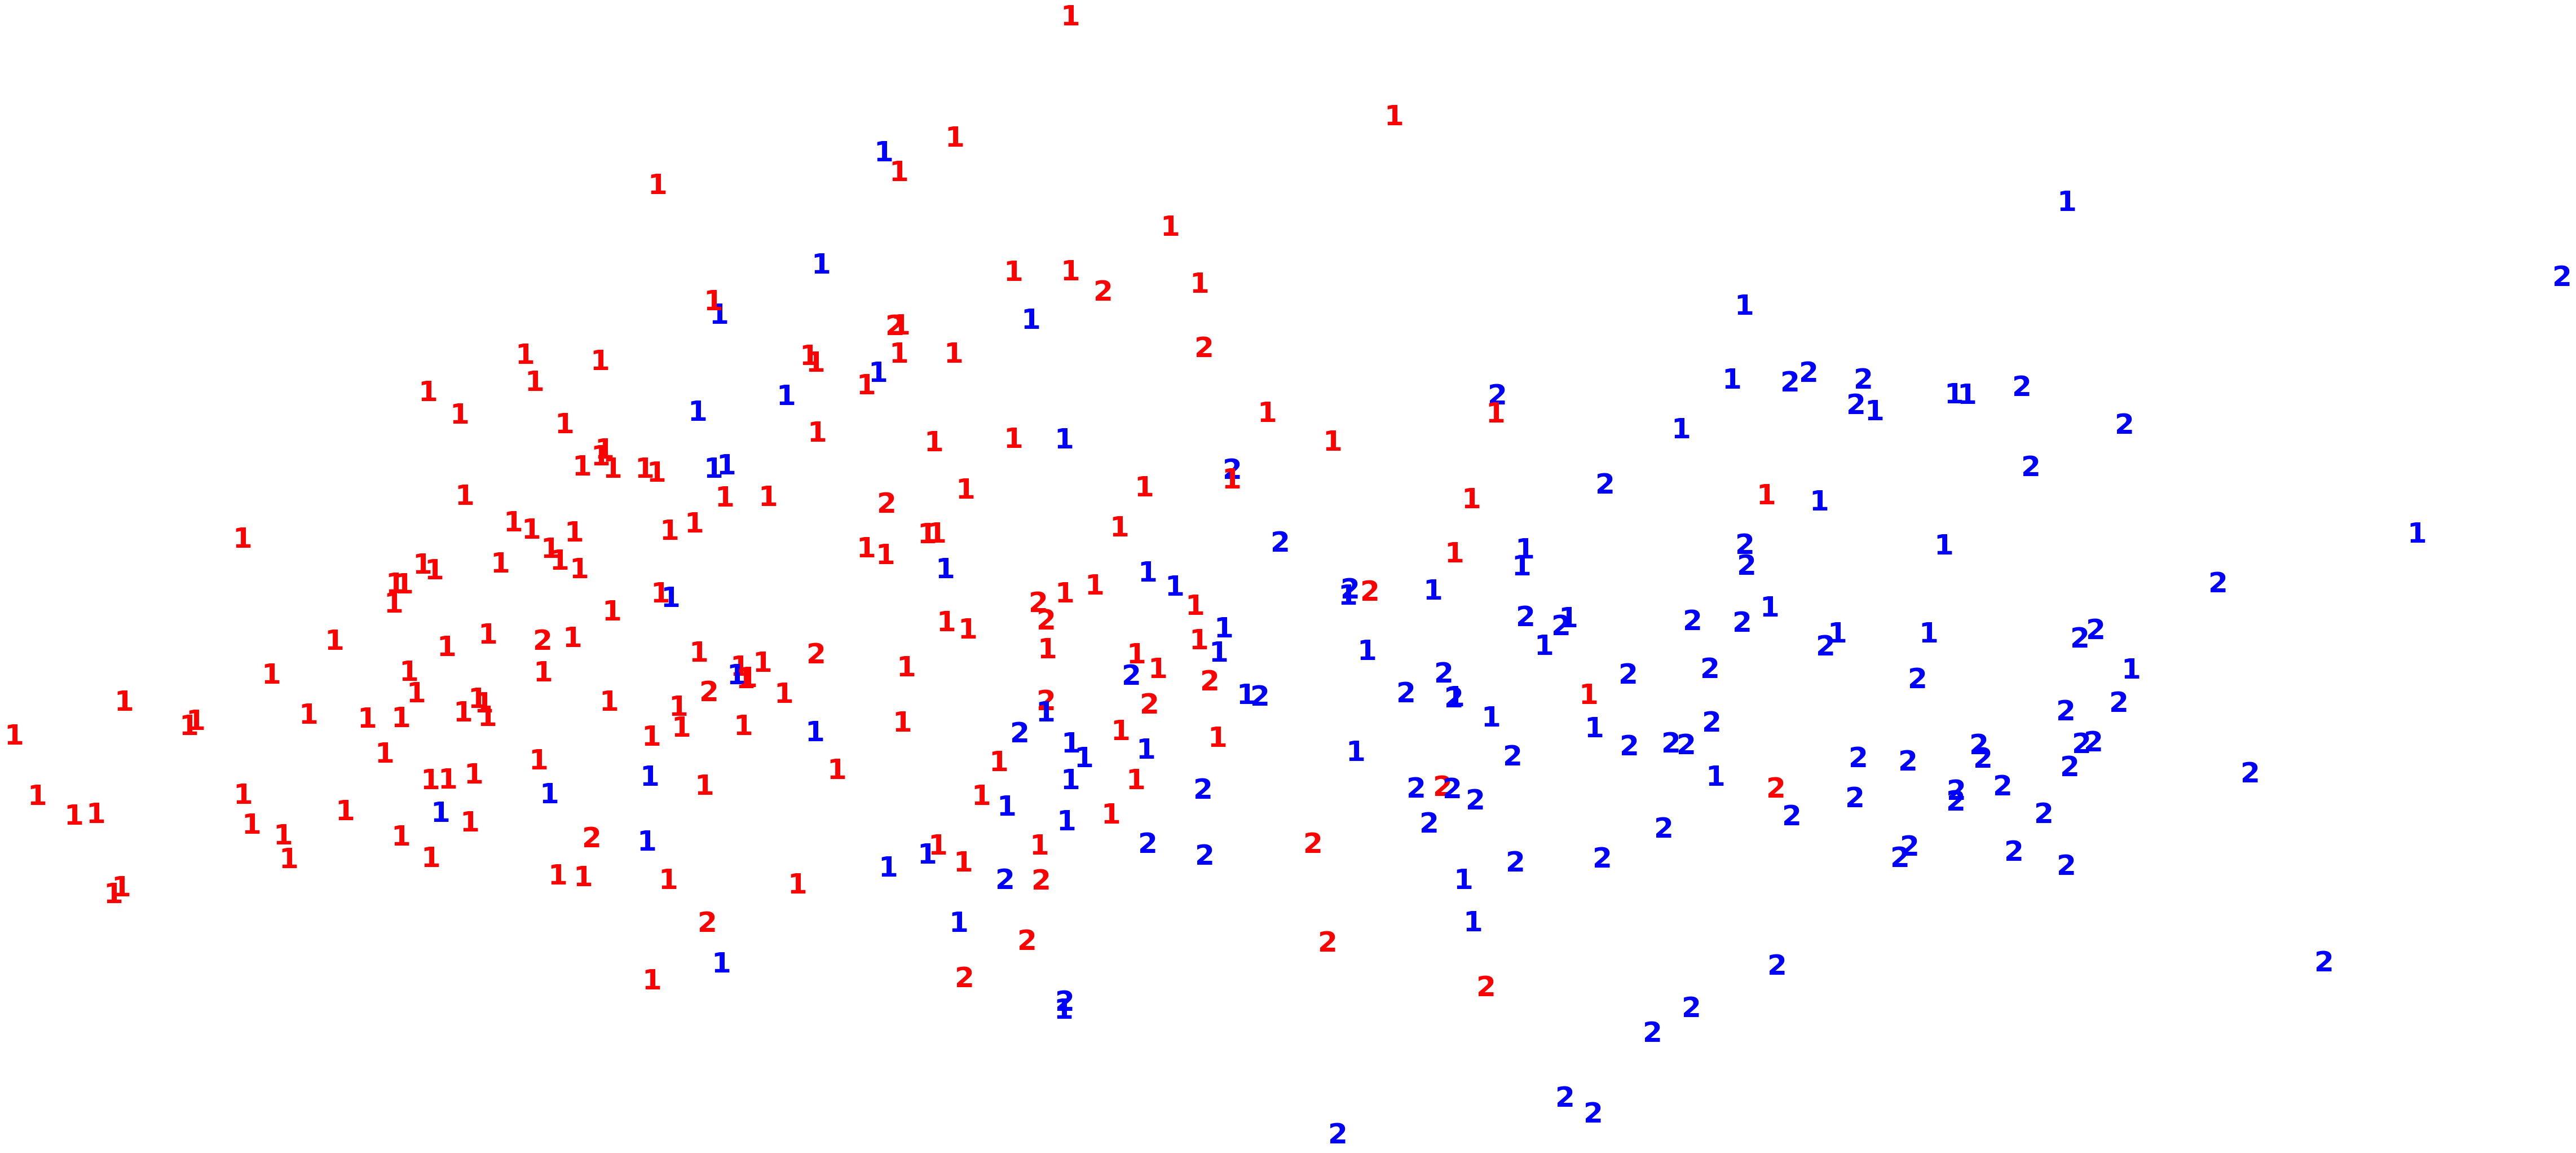

Adjusted Rand Index of the GMM solution: 0.18389186035089963
The silhoutte score of the GMM solution: 0.13628813153331445


In [16]:
probs = gmm_cluster.predict_proba(X_std)

size = 50 * probs.max(1) ** 2  # square emphasizes differences

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': size[i]}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

After running the GMM on the Heart Disease dataset and comparing it to all the other clustering teqniques we've used so far, it seems that the Hierarchical Clustering with linkage='average' and affinity='cosine' so far produced the highest ARI and Silouette Score.

In [24]:
# Implementation of scikit-learn has a parameter called covariance_type:

# Defining the agglomerative clustering for covariance_type="full":
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type='full')
# Fit Model:
clusters = gmm_cluster.fit_predict(X_std)
print("ARI with covariance_type='full': {}".format(
    metrics.adjusted_rand_score(y, clusters)))
print("Silhouette Score with covariance_type='full': {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print('-'*30)

# Defining the agglomerative clustering for covariance_type="tied":
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type='tied')
# Fit Model:
clusters = gmm_cluster.fit_predict(X_std)
print("ARI with covariance_type='tied': {}".format(
    metrics.adjusted_rand_score(y, clusters)))
print("Silhouette Score with covariance_type='tied': {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print('-'*30)

# Defining the agglomerative clustering for covariance_type="diag":
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type='diag')
# Fit Model:
clusters = gmm_cluster.fit_predict(X_std)
print("ARI with covariance_type='diag': {}".format(
    metrics.adjusted_rand_score(y, clusters)))
print("Silhouette Score with covariance_type='diag': {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print('-'*30)

# Defining the agglomerative clustering for covariance_type="spherical":
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type='spherical')
# Fit Model:
clusters = gmm_cluster.fit_predict(X_std)
print("ARI with covariance_type='spherical': {}".format(
    metrics.adjusted_rand_score(y, clusters)))
print("Silhouette Score with covariance_type='spherical': {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print('-'*30)

ARI with covariance_type='full': 0.18389186035089963
Silhouette Score with covariance_type='full': 0.13628813153331445
------------------------------
ARI with covariance_type='tied': 0.18389186035089963
Silhouette Score with covariance_type='tied': 0.13628813153331445
------------------------------
ARI with covariance_type='diag': 0.18389186035089963
Silhouette Score with covariance_type='diag': 0.13628813153331445
------------------------------
ARI with covariance_type='spherical': 0.20765243525722468
Silhouette Score with covariance_type='spherical': 0.12468753110276876
------------------------------


The ARI for covariance_type="spherical" is higher than the other covariance_type's.
The Silhouette Score for covariance_type="spherical" is lower than the other covariance_type's.